In [1]:
%matplotlib widget
from pyGCodeDecode import gcode_interpreter
import matplotlib.pyplot as plt
import numpy as np
# ipympl can be install via pip: "pip install ipympl"

In [2]:
anisoprint_A4 = {
    #general properties
    "nozzle_diam"   :   0.4,
    "filament_diam" :   1.75,
    
    #default settings
    "velocity"      :   35,
    "acceleration"  :   20,
    "jerk"          :   10,
    
    #axis max speeds
    "Vx"            :   80,
    "Vy"            :   80,
    "Vz"            :   80,
    "Ve"            :   25
    }

In [3]:
initial_position = None

new = gcode_interpreter.simulate(filename=r"test.gcode",printer=anisoprint_A4,initial_position=initial_position)

[##########] 100% of Planner Block Generation Done...
 >> pyGCodeDecode extracted 817 states from test.gcode and generated 800 plannerblocks. 
 Estimated time to travel all states with provided printer settings is 215.81086526995082 seconds.


In [1]:
new.plot_3d_position(show=True)

NameError: name 'new' is not defined

points [[[0.22199317 0.87073231]
  [0.20671916 0.91861091]
  [0.48841119 0.61174386]]

 [[0.76590786 0.51841799]
  [0.2968005  0.18772123]
  [0.08074127 0.7384403 ]]]
dist:  [0.05025591 0.46681057]
TI: 5
XI:  [0.22199317 0.25165327 0.33057258 0.40949188 0.48841119]
dist:  [0.57395301 1.16553824]
TI: 5
XI:  [0.76590786 0.52775136 0.29358067 0.18716097 0.08074127]


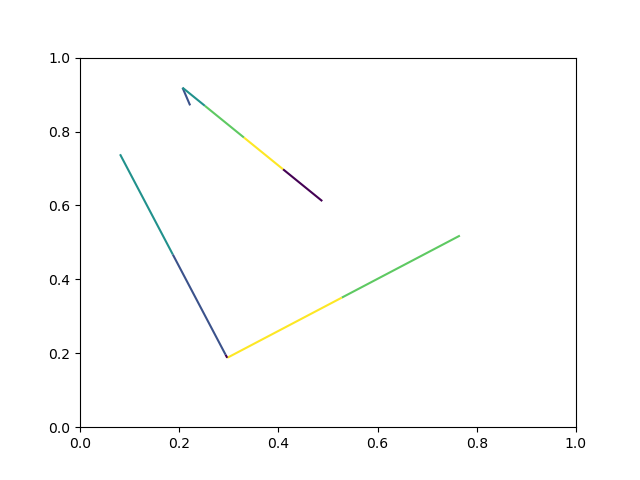

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
# Make random number generation consistent between runs
np.random.seed(5)

def main():
    numlines, numpoints = 2, 3
    points = np.random.random((numlines, numpoints, 2))
    print("points",points)
    # Add "num" additional segments to each line
    segments, color_scalar = zip(*[interp(item, num=5) for item in points])

    segments = np.vstack(segments)
    color_scalar = np.hstack(color_scalar)

    fig, ax = plt.subplots()
    coll = LineCollection(segments)
    coll.set_array(color_scalar)
    ax.add_collection(coll)

    plt.show()

def interp(data, num=5):
    """Add "num" additional points to "data" at evenly spaced intervals and
    separate into individual segments."""
    x, y = data.T
    dist = np.hypot(np.diff(x - x.min()), np.diff(y - y.min())).cumsum()
    print("dist: ",dist)
    t = np.r_[0, dist] / dist.max()
    #print(t)
    ti = np.linspace(0, 1, num, endpoint=True)
    print("TI:",5)
    xi = np.interp(ti, t, x)
    yi = np.interp(ti, t, y)
    print("XI: ",xi)

    # Insert the original vertices
    indices = np.searchsorted(ti, t)
    xi = np.insert(xi, indices, x)
    yi = np.insert(yi, indices, y)

    return reshuffle(xi, yi), ti

def reshuffle(x, y):
    """Reshape the line represented by "x" and "y" into an array of individual
    segments."""
    points = np.vstack([x, y]).T.reshape(-1,1,2)
    points = np.concatenate([points[:-1], points[1:]], axis=1)
    return points

main()